#                                            ML PROJECT

# The data:

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabet letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds.

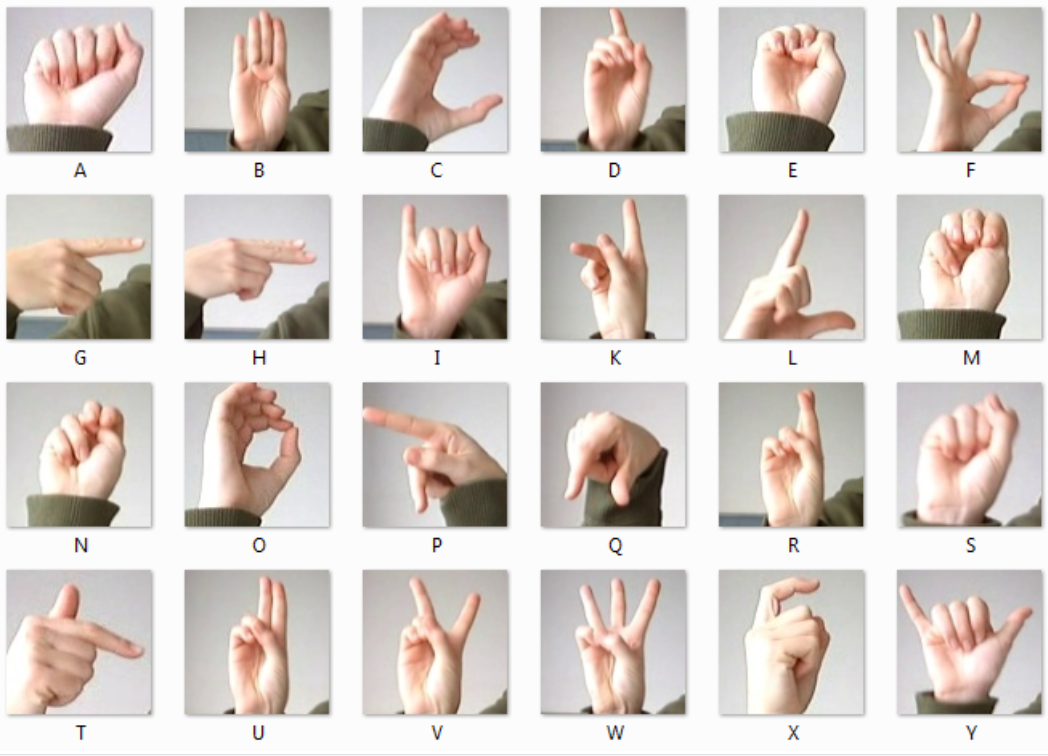

In [64]:
from IPython.display import Image
Image("wow.png")

In [1]:
## loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# creating dataframe

In [2]:
data=pd.read_csv("sign_mnist_train.csv")

In [3]:
df=pd.DataFrame(data)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
df.shape

(27455, 785)

## we come to know the features and labels

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)


In [9]:
train.shape


(19218, 785)

In [10]:
test.shape

(8237, 785)

In [5]:
labels = train['label'].values

In [12]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

# 9 (j) and 25(z)

## are missing


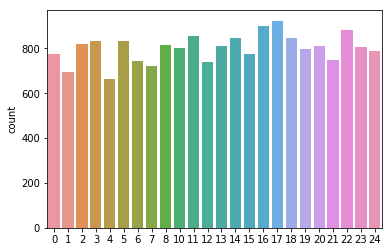

In [62]:
plt.figure()
sns.countplot(x =labels)

# we see uniform data

In [6]:
train.drop('label', axis = 1, inplace = True)

C:\Users\sanch\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

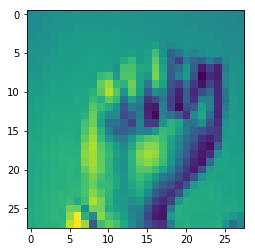

In [8]:
plt.imshow(images[0].reshape(28,28))

In [9]:
print (labels[0])

0


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 0)

# DECISION TREE 

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.0
Accuracy of Decision Tree classifier on test set: 0.8198057578910857


# knn classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train) 

In [13]:
knn_predictions = knn.predict(x_test)  

In [14]:
from sklearn import metrics as m
m.accuracy_score(y_test,knn_predictions)

0.9845646895594866

# MULTINOMIAL NB

In [15]:
from sklearn.naive_bayes import MultinomialNB
classification = MultinomialNB()
classification.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
y_pred1=classification.predict(x_test)

In [17]:
m.accuracy_score(y_test,y_pred1)


0.5329517863336802

# GAUSSIAN NB

In [18]:
from sklearn.naive_bayes import GaussianNB
classification = GaussianNB()
classification.fit(x_train,y_train)

GaussianNB(priors=None)

In [19]:
y_pred = classification.predict(x_test)

In [20]:
m.accuracy_score(y_test,y_pred)

0.44779743322927507

# LINEAR REGRESSION

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_pred=reg.predict(x_test)

In [23]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error:  3.195633631847419
Mean Squared Error:  16.163191911042038
Root Mean Squared Error:  4.020347237620407


In [24]:
print (reg.score(x_test,y_test))

0.6942166866188162


# LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
predictions=lr.predict(x_test)

In [27]:
lr.score(x_test,y_test)

0.9996531390912244

# accuracy
 - Accuracy of Decision Tree classifier: 0.8198057578910857
 - Accuracy of KNN classifier: 0.9845646895594866
 - Accuracy of Gaussian NB: 0.44779743322927507
 - Accuracy of Multinomial NB: 0.5329517863336802
 - Accuracy of Linear regression: 0.6985801136206853
 - Accuracy of Linear regression: 0.9996531390912244


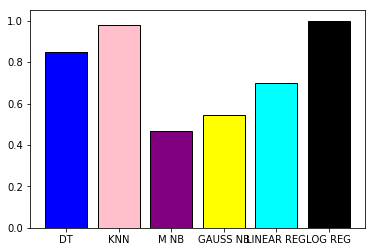

In [30]:
d=[0.8503793626707132,0.9807283763277693,0.4652856817664466,0.5422262690644206,0.6985801136206853, 0.9996531390912244]
bars = ('DT', 'KNN', 'M NB', 'GAUSS NB', 'LINEAR REG','LOG REG')
y_pos = np.arange(len(bars))
plt.bar(y_pos, d,color=['blue', 'pink', 'purple', 'yellow', 'cyan','black'], edgecolor='black')
plt.xticks(y_pos, bars)
plt.show()


# Thank you 